# <p style="text-align: center; font-size: 2rem"> <b> Data Exploration and Preprocessing </b></p>

---

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #EDC0C7; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>
    
        
- [1. Data Overview](#1)
    - [1.1 Rows and Columns](#1.1)
    - [1.2 Duplicate Rows](#1.2)
    - [1.3 Data Types](#1.3)

- [2. Data Distribution](#2)
    - [2.1 Numerical Columns](#2.1)
        - [Summary Statistics](#2.1.1)
        - [Histogram](#2.1.2)
    - [2.2 Categorical Columns](#2.2)
    - [2.3 Missing Values, Abnormal Values and Outliers](#2.3)
        - [Missing Values](#2.3.1)
        - [Abnormal Values and Outliers](#2.3.2)
    
- [3. Data Modelling](#3)
    - [3.1 Problem Statement](#3.1)
    - [3.2 Data Preparation](#3.2)
    - [3.3 Create, train and test models](#3.3)


## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">0. Import libraries </div>

👉 These are the main libraries used for data exploration:
+ `numpy`: used for mathematical operations on matrices
+ `pandas`: used to store data from `.csv` files and operate functions on DataFrame
+ `matplotlib`: used to visualize data
+ `seaborn`: used to visualize data
+ `ast`:  used for literal_eval to safely evaluate strings containing Python expressions
+ `re`: used for regular expressions to extract, parse, clean strings
+ `parse` from `dateutil.parser`: used for parsing date strings
+ `datetime` from `datetime`: Provides classes for working with dates and times

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
import ast
import re

# Disable copy warning
pd.options.mode.chained_assignment = None 

# Disable future warnings and user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<a class="anchor" id="#1"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Data Overview  </div>

In [2]:
manga_df = pd.read_csv('/kaggle/input/manga-and-anime-dataset/manga.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Published,Genres,Themes,Demographics,Serialization,Author
0,Berserk,9.47,334154,1,1,"670,559","123,574",Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],Young Animal,"Miura, Kentarou (Story & Art), Studio Gaga (Art)"
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,157522,2,26,"257,957","43,113",24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","['Action', 'Adventure', 'Mystery', 'Supernatur...",[],"['Seinen', 'Shounen']",Ultra Jump,"Araki, Hirohiko (Story & Art)"
2,Vagabond,9.25,138009,3,15,"368,332","40,575",37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","['Action', 'Adventure', 'Award Winning']","['Historical', 'Samurai']",['Seinen'],Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji..."
3,One Piece,9.22,368951,4,3,"603,122","115,123",Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","['Action', 'Adventure', 'Fantasy']",[],['Shounen'],Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)"
4,Monster,9.15,94806,5,29,"238,291","20,674",18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","['Award Winning', 'Drama', 'Mystery']","['Adult Cast', 'Psychological']",['Seinen'],Big Comic Original,"Urasawa, Naoki (Story & Art)"


<a class = "anchor" id = "1.1"></a>
## <span style='color:#2B9C15 '> 1.1 Rows and Columns </span>

### 👉 **Total number of rows and columns of data** 

In [3]:
n_rows , n_cols = manga_df.shape
print(f'There are {n_rows} rows and {n_cols} columns in the dataset')

There are 10000 rows and 16 columns in the dataset


### 👉 **Meaning of each row and each column** 

+ Each rows in the dataset represents information of a manga series in top 10000 manga series on MyAnimeList

+ The following is the meaning of each column in the data


| **COLUMN**            |**MEANING**               |
|:----------------------|:-------------------------------------------------------------|
|**`Title`**            | Title of the manga (written in English phonetic)                                                |
|**`Score`**            | Score on the MyAnimeList site (MAL)                                                             |
|**`Vote`**             | Number of readers voting for the manga                                                          |
|**`Ranked`**           | Ranking of manga on the web MyAnimeList (MAL)                                                   |
|**`Popularity`**       | The popularity of the manga                                                                     |
|**`Members`**          | Number of readers who have this manga in their list                                             |
|**`Favorite`**         | Number of readers who love this manga                                                           |
|**`Volumes`**          | Number of volumes of manga                                                                      |
|**`Chapters`**         | Number of chapters of manga                                                                     |
|**`Status`**           | Status of the manga (ongoing, completed, on hiatus,...)                                         |
|**`Published`**        | Release time to the end time of the manga                                                       |
|**`Genres`**           | Genres of manga                                                                                 |
|**`Themes`**           | The themes of the manga                                                                         |
|**`Author`**           | Author of manga                                                                                 |
|**`Demographic`**      | The target audience of the manga (shounen, shoujo, seinen, josei)                               |
|**`Serialization`**    | The magazine that the manga is serialized in                          |

<a class = "anchor" id = "1.2"></a>
## <span style='color:#2B9C15 '> 1.2 Duplicate Rows </span>

### 👉 **Check and handle duplicates rows** 

In [4]:
duplicated_rows = manga_df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    manga_df = manga_df.drop_duplicates()
    print(f'After drop duplicated rows, there are {manga_df.shape[0]} rows left')

There are 0 rows that are duplicated, which means each row in the DataFrame is unique.
So that we do not need to continue processing duplicate lines


<a class = "anchor" id = "1.3"></a>
## <span style='color:#2B9C15 '> 1.3 Data Types </span>

In this section, we will **check the current data types** of each column and **convert them to the correct data type** if necessary.

### 👉 **Check the current data types of each column**

First we calculate the data type (dtype) of each column in `manga_df` by using `dtypes` function of `pandas` library.

In [5]:
manga_df.dtypes.to_frame('Data Type')

,Data Type
Title,object
Score,float64
Vote,int64
Ranked,int64
Popularity,int64
Members,object
Favorite,object
Volumes,object
Chapters,object
Status,object


To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

manga_df.apply(open_object_dtype, axis=0)

Title                             {<class 'str'>}
Score                           {<class 'float'>}
Vote                              {<class 'int'>}
Ranked                            {<class 'int'>}
Popularity                        {<class 'int'>}
Members                           {<class 'str'>}
Favorite                          {<class 'str'>}
Volumes                           {<class 'str'>}
Chapters                          {<class 'str'>}
Status                            {<class 'str'>}
Published                         {<class 'str'>}
Genres                            {<class 'str'>}
Themes                            {<class 'str'>}
Demographics                      {<class 'str'>}
Serialization    {<class 'float'>, <class 'str'>}
Author           {<class 'float'>, <class 'str'>}
dtype: object

Let's evaluate the data types of columns in our dataset to ensure appropriateness:

+ Suitable Types: `Title`, `Score`, `Vote`, `Ranked`, `Popularity`, `Status`, `Demographic`, `Serialization`, `Author`, `Genres`, `Themes`

+ Need Conversion to **int**: `Members`, `Favorite`, `Volumes` and `Chapters`

+ Need Conversion to **datetime**: `Published`

### 👉 **Convert data types**

Firstly, converting the data type of the columns to **int / float**

In [7]:
# Convert to int
manga_df['Members'].replace(',','', regex=True, inplace=True)
manga_df['Favorite'].replace(',','', regex=True, inplace=True)
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')

# Convert to float because type int does not contain NaN values
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')


Let's check again data type of `Members`, `Favorite`, `Volumes` and `Chapters`

In [8]:
check = ['Members', 'Favorite', 'Volumes', 'Chapters']
manga_df[check].dtypes

Members       int64
Favorite      int64
Volumes     float64
Chapters    float64
dtype: object

The two columns `Volumes` and `Chapters` have the value `NaN` so they cannot be converted to `int`. Temporarily leave these 2 columns in `float` style and will convert them again after handling the missing value.

About the columns `Author` we need to standardize the author names in the dataset using the function `extract_author_name()`. This function will ensure a consistent format for author names, regardless of the various styles they may have initially.`

In [9]:
def extract_author_names(text):
    # Replace the commas separating last names from first names with a space
    text = re.sub(r'\,\s', ' ', text).strip()
    # Remove roles within parentheses, including the parentheses
    text = re.sub(r'\s*\([^)]*\)', ' ', text).strip()
    # Split the string by a comma followed by a space, which now only occurs between individuals
    return ', '.join(reversed(text.split('  ')))

manga_df['Author'] = manga_df['Author'].replace(to_replace=np.nan, value='')
# Apply the function to each row in the 'Author' column
manga_df['Author'] = manga_df['Author'].apply(extract_author_names)

Converting the data type of the columns to **datetime**

- Due to the complexity of storing information in the `Published` column, which represents a range from release date to end date, we intend to enhance data handling by splitting this column into two new ones: `Release date` and `Completed date`.

- Following this operation, we will remove the original `Published` column to avoid redundancy.

In [10]:
start = []
end = []

for row in manga_df['Published']:
    if ' to ' in row:
        s, e = row.split(' to ')

        if s.isdigit() and e.isdigit():
            s = f"01 Jan, {s}"
            e = f"01 Jan, {e}"
        elif len(s.split()) == 2 and len(e.split()) == 2:
            s = f"{s}, {dt.now().year}"
            e = f"{e}, {dt.now().year}"

    elif row.isdigit():
        s = f"01 Jan, {row}"
        e = np.nan
    else:
        try:
            s = parse(row, fuzzy=True)
            e = np.nan
        except ValueError:
            s = np.nan
            e = np.nan

    start.append(s)
    end.append(e)

date_df = pd.DataFrame({'Release date': start, 'Completed date': end})

# Assigning the new columns to manga_df
manga_df['Release date'] = date_df['Release date']
manga_df['Completed date'] = date_df['Completed date']

# Convert 'Release date' and 'Completed date' to datetime64 and set time to midnight
manga_df['Release date'] = pd.to_datetime(manga_df['Release date'], errors='coerce').dt.normalize()
manga_df['Completed date'] = pd.to_datetime(manga_df['Completed date'], errors='coerce').dt.normalize()

# Dropping the original 'Published' column
manga_df = manga_df.drop(columns='Published')

Convert list type column to string

In [11]:
lst_column = ['Demographics', 'Genres', 'Themes']

for col in lst_column:
    manga_df[col] = manga_df[col].apply(lambda x: ', '.join(eval(x)) if len(eval(x)) > 0 else np.nan)
    
manga_df[lst_column]

,Demographics,Genres,Themes
0,Seinen,"Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological"
1,"Seinen, Shounen","Action, Adventure, Mystery, Supernatural",NaN
2,Seinen,"Action, Adventure, Award Winning","Historical, Samurai"
3,Shounen,"Action, Adventure, Fantasy",NaN
4,Seinen,"Award Winning, Drama, Mystery","Adult Cast, Psychological"
...,...,...,...
9995,Seinen,NaN,NaN
9996,Shoujo,"Drama, Fantasy, Romance, Supernatural",NaN
9997,Shounen,"Action, Horror, Mystery",NaN
9998,Shoujo,"Drama, Romance",NaN


Let's check data type of `Release date` and `Completed date`

In [12]:
check = ['Release date', 'Completed date']
manga_df[check].dtypes

Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

After converting the data type of the columns, we will split the columns into 2 groups: **numerical** columns and **categorical** columns

In [13]:
def convert_features(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
    return df

features = ['Title', 'Author', 'Serialization', 'Genres', 'Themes', 'Demographics', 'Status']
manga_df = convert_features(manga_df,features)

Now, checking all data type columns after conversion

In [14]:
manga_df.dtypes

Title                   category
Score                    float64
Vote                       int64
Ranked                     int64
Popularity                 int64
Members                    int64
Favorite                   int64
Volumes                  float64
Chapters                 float64
Status                  category
Genres                  category
Themes                  category
Demographics            category
Serialization           category
Author                  category
Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

<a class = "anchor" id = "2"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Data Distribution </div>
To explore the distribution of columns, we will follow these steps:

- Numerical columns: 
    - Calculate and interpret **summary statistics** of the columns
    - Plot **histograms** to better understand the distribution of the columns

- Categorical columns:
    - Calculate number of **unique values** in each column
    - Plot **charts** to better understand the distribution of the columns

- Abnormal values, missing values and outliers:
    - Calculate number of missing values per column, per row and handle them
    - Identify and handle abnormal values and outliers


<a class = "anchor" id = "2.1"></a>
## <span style='color:#2B9C15 '>2.1 Numerical Columns </span>

Columns have numeric data types: 

|**Name**|**Data Type**|
|:---|:---|
|`Score`|float64|
|`Vote`|int64|
|`Ranked`|int64|
|`Popularity`|int64|
|`Members`|int64|
|`Favorite`|int64|
|`Volumes`|float64|
|`Chapters`|float64|
|`Release date`|datetime64[ns]|
|`Completed date`|datetime64[ns]|

### 👉 **Summary Statistics** <a class = "anchor" id = "2.1.1"></a>

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile 
- The median 
- The upper quartile 
- The max

We will save the results to a DataFrame `num_col_dist_df`, where:
- The names of the columns are the names of the numeric columns in `manga_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  


In [15]:
numeric_cols = manga_df.select_dtypes(exclude=['category']).columns
num_col_dist_df = manga_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage
num_col_dist_df

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Release date,Completed date
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,7382.00,7479.00,8387,6212
mean,7.37,3505.67,5000.79,8737.93,8824.94,348.14,6.65,47.93,2012-03-03 09:32:46.328841984,2012-07-11 15:41:36.587250688
min,6.90,100.00,1.00,1.00,203.00,0.00,1.00,1.00,1950-01-15 00:00:00,1951-02-20 00:00:00
25%,7.08,318.00,2500.75,3104.50,1134.00,6.00,2.00,8.00,2008-02-22 12:00:00,2008-12-11 12:00:00
50%,7.28,792.00,4992.50,7351.50,2488.00,19.00,4.00,23.00,2013-04-24 00:00:00,2013-11-25 00:00:00
75%,7.56,2248.00,7500.25,13281.25,6393.50,75.00,9.00,56.00,2018-03-13 12:00:00,2018-06-15 00:00:00
max,9.47,401815.00,10060.00,32962.00,670559.00,123574.00,200.00,1957.00,2023-11-27 00:00:00,2024-01-01 00:00:00
std,0.38,14026.00,2887.47,6707.79,27776.00,2746.35,8.22,77.82,NaN,NaN
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,26.18,25.21,16.13,37.88


As we can see:
+ About **missing percentage**:
     + All columns except `Volumes`, `Chapters`, `Release date` and `Completed date` have full data (missing rate = 0%)
    
     + The column `Volumes` has **26%** of the total values missing. While the `Chapters` column is **25%**. It can be seen that the missing rate of these two columns is not too high and is acceptable. Columns `Volumes` and `Chapters` are missing mainly due to their `Status` (incomplete, on hold, on hiatus,...), because these two columns only display volume and chapter numbers when the manga is completed (or stopped indefinitely).
    
     + `Release date` is missing **16%** of the data, likely because the information is not available, missing or not recorded.
    
     + `Completed date` is missing a lot, more than **37%**. The reason may be that the manga is not completed or there is no information.
     
+ About **min**, **median** (50%), **lower quartile** (25%), **upper quartile** (75%) and **max**:
     + Except for the `Score` column, numeric columns all have very wide ranges.
     
     + The `Score` column has narrow range from 6.9 to 9.4. This is a reasonable range because the dataset is the top 10000 manga series on MyAnimeList, so the score is quite high.

     + The manga series in the dataset have release dates spanning from 1950 to 2023.
     
     + If the manga series in the data have been completed, they were all completed between 1951 and 2024 (the time the data was collected).

To better understand the reason for missing values of the columns `Volumes`, `Chapters`, `Release date` and `Completed date`, we will consider these columns in each case of the column `Status`:

- Missing manga `Volumes` number column grouped by `Status`:

In [16]:
status, missing = np.unique(manga_df['Status'][manga_df['Volumes'].isna()], return_counts=True)
missing_by_status = pd.DataFrame({'Status':status, 'Missing Rows':missing})
missing_by_status

,Status,Missing Rows
0,Discontinued,2
1,Finished,628
2,On Hiatus,8
3,Publishing,1980


- Missing manga `Chapters` number column grouped by `Status`:

In [17]:
status, missing = np.unique(manga_df['Status'][manga_df['Chapters'].isna()], return_counts=True)
missing_by_status = pd.DataFrame({'Status':status, 'Missing Rows':missing})
missing_by_status

,Status,Missing Rows
0,Discontinued,1
1,Finished,522
2,On Hiatus,18
3,Publishing,1980


+ As mentioned above, the manga is missing chapters or volumes mainly because the manga is not completed (Publishing). Chapters` and `Volumes` will be updated when the manga is completed or discontinued.

+ For manga that only have `Chapters` but no `Volumes`, the biggest reason is one-shot manga series (series with only 1 chapter) so there will be no volumes. Such one-shot manga make up a large proportion on MAL.

+ For manga that only have `Volumes` but no `Chapters`, the biggest reason is that light novels (light_novels or novels) are often published in volumes and the author does not divide chapters when writing. There are also many novel series on MAL.

+ The remaining small part is missing because the MAL website does not have enough information about the manga.

### **Histogram** <a class = "anchor" id = "2.1.2"></a>

**`Score` & `Popularity`**

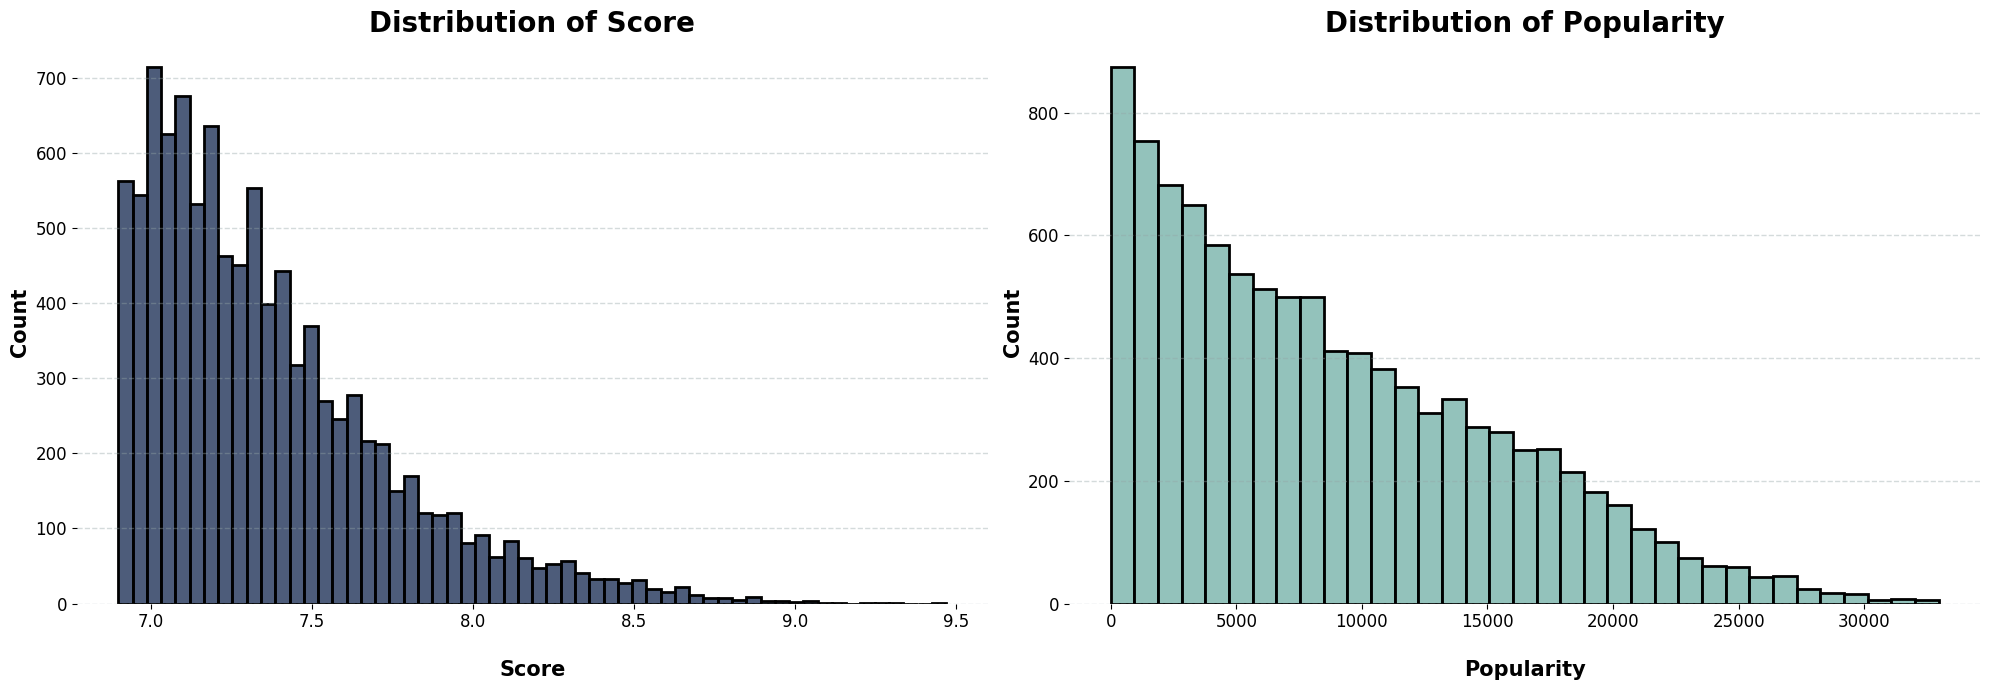

In [18]:
col = ['Score', 'Popularity']
color = ["#11264e","#6faea4"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.axes.tick_params(labelsize=12)
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### 📖 **COMMENTS:**

- Score:
    - Scores of manga range from 6.8 to 7.3 at most. Notably, the most common score is 7, with over 700 mangas attaining this rating.
    - As the score increases, the number of mangas achieving that score decreases. Scores between 9 and 9.5 are quite rare, with just over 10 mangas reaching such high ratings.
- Popularity:
    - The popularity distribution indicates that the majority of manga fall within the range of 0 to 5000, encompassing over 600 to 800 mangas.
    
Both charts display a right-skewed distribution, resembling the shape of the lower half of a normal distribution. This skewness is expected given that the dataset comprises the top 10,000 mangas with the highest scores on MyAnimeList.


**`Release date`** & **`Completed date`**

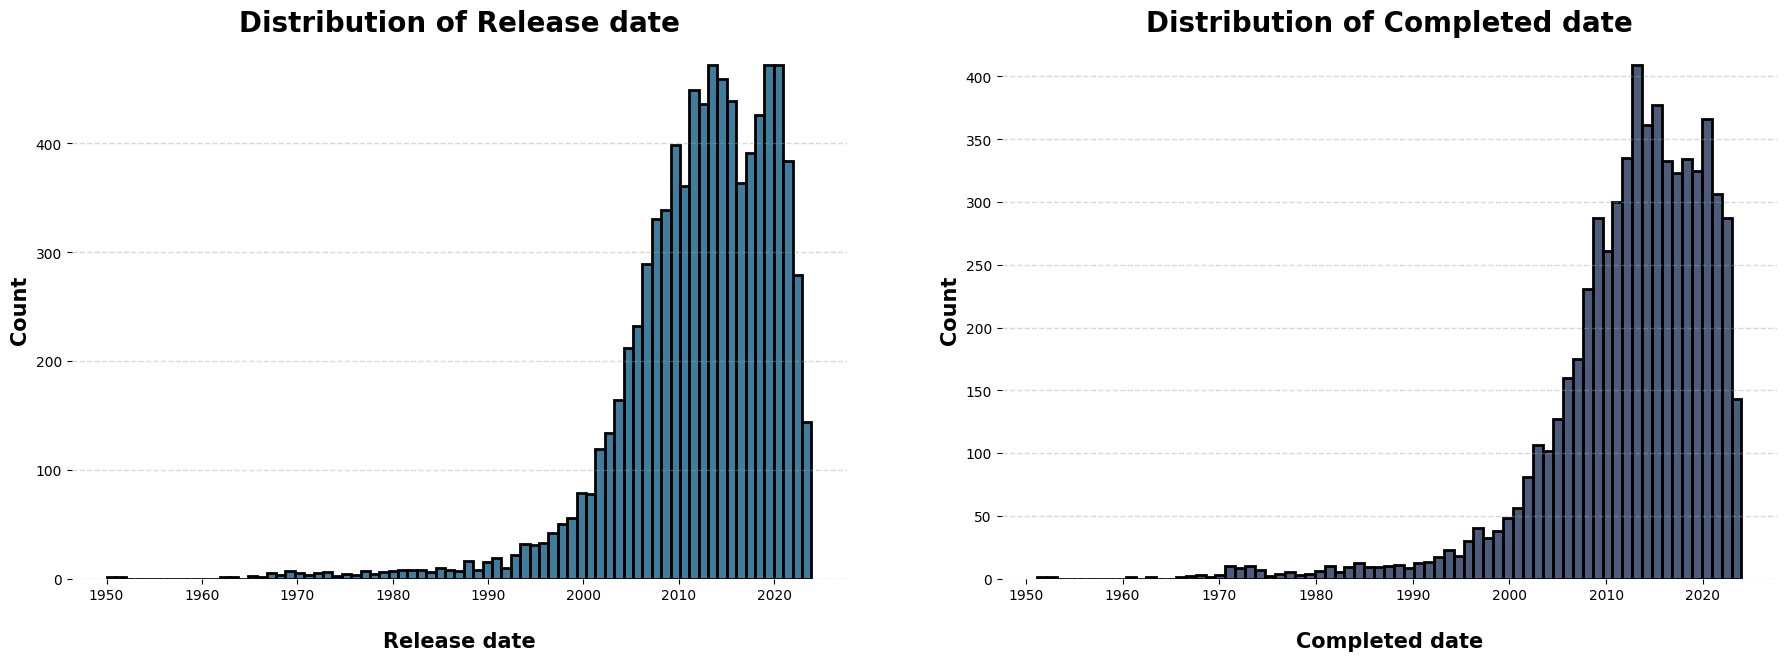

In [19]:
col = ['Release date', 'Completed date']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Release date:
    + From 2010 to 2015 and from 2018 to 2020 is the period with the most manga series released - more than 400 manga series released.
    + Before 2000, it seemed like manga was not very popular and well known, so the number of manga released in those years was the least.
    + By 2023, more than 100 manga series have been released this year
+ Completed date:
    + From 2010 to 2020 is the period when the most manga series were completed - more than 300 per year.
    + By 2023, more than 100 manga series have been completed this year

The two graphs above both have a left-sided distribution, but this can be explained by the historical development of the manga industry. Before 2000, manga was not popular and well known, so the number of manga released and completed in those years was the least. From 2010 to 2020, the manga industry grew strongly, so the number of manga released and completed in those years was the most.

**`Volumes`** and **`Chapters`**

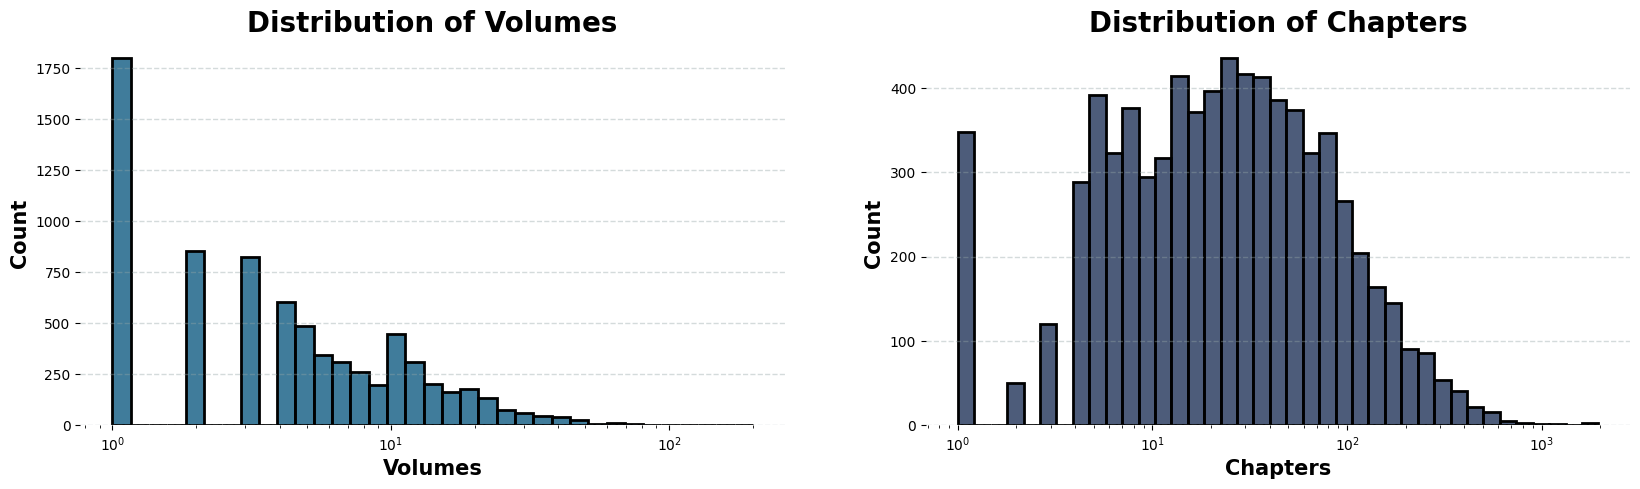

In [20]:
col = ['Volumes','Chapters']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2, log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Volumes:
    + Most manga series have less than or equal to 10 volumes. Very few mangas have more than 10 volumes.
    + This is understandable because a volume includes many chapters, so almost no manga has 100 volumes.

+ Chapters:
    + In contrast to Volumes, manga series will usually have from 10 to 100 chapters - about more than 300 mangas.
    + There are still 1 to 2 mangas that have more than 1000 chapters.

**`Vote`**, **`Members`**

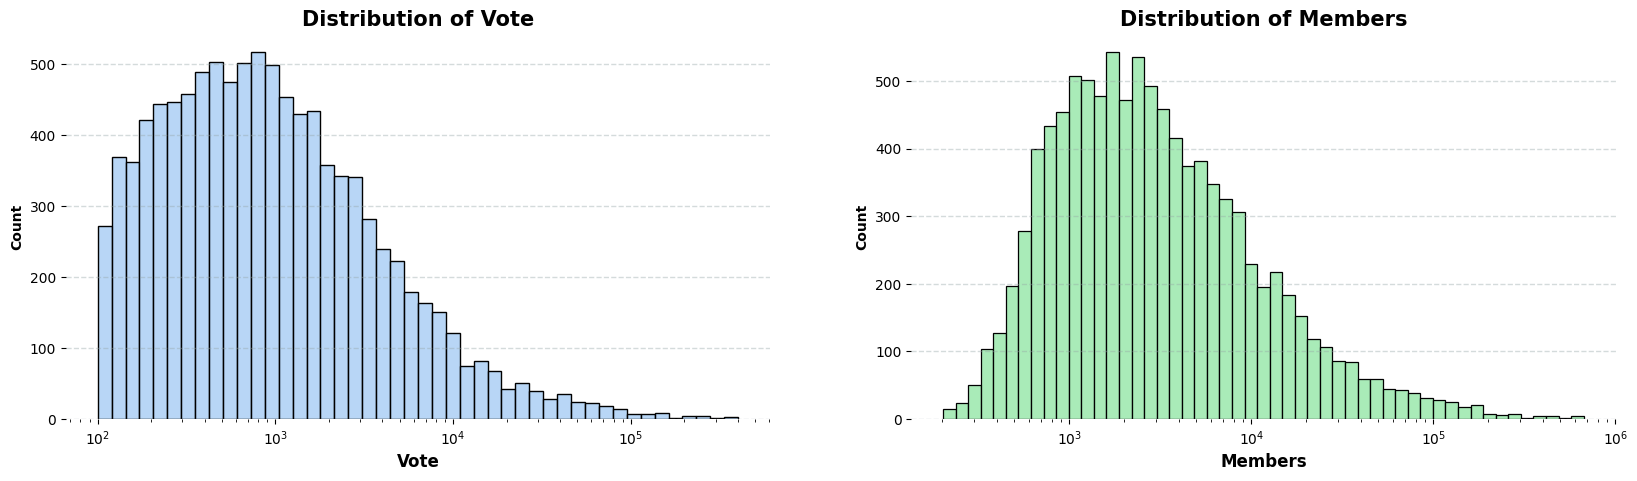

In [21]:
col = ['Vote','Members']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=15, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=12, weight='bold')
    p.axes.set_ylabel('Count',fontsize=10, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Vote:
    + Most manga series have votes ranging from 500 to 1000.
    + No manga series has less than 100 votes. This is understandable because the dataset is the top 10000 manga series on MyAnimeList, so the number of votes is quite high.
    + There are about 10 manga series with over 100,000 votes

+ Members:
    + More than 500 manga series added to their reading lists by 1,000 to 10,000 readers. This range is the most common range.
    + There are about 10 mangas that more than 700,000 readers added to their reading lists. These are the books with the most Members.


In [22]:
manga_df.dtypes

Title                   category
Score                    float64
Vote                       int64
Ranked                     int64
Popularity                 int64
Members                    int64
Favorite                   int64
Volumes                  float64
Chapters                 float64
Status                  category
Genres                  category
Themes                  category
Demographics            category
Serialization           category
Author                  category
Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

<a class = "anchor" id = "2.2"></a>
## <span style='color:#2B9C15 '> 2.2 Categorical Columns </span>

Columns have non-numeric data types: 

|**Name**|**Data Type**|
|:---|:---|
|`Title`|category|
|`Status`|category|
|`Genres`|category|
|`Themes`|category|
|`Demographics`|category|
|`Serialization`|category|
|`Author`|category|

For columns with non-numeric data types, we calculate:
- Percentage of missing values
- Number of unique values in each column
- Distribution of each column (number of occurrences of each unique value)

In [23]:
manga_df.describe(include=['category'])

,Title,Status,Genres,Themes,Demographics,Serialization,Author
count,10000,10000,7286,1780,6112,8211,10000
unique,9684,4,916,536,9,644,6231
top,Clover,Finished,"Comedy, Romance","Isekai, Reincarnation",Shoujo,Naver Webtoon,Tezuka Osamu
freq,4,7891,628,108,2270,302,56


**Considering columns of type string:  `Title`, `Status`** 

In [24]:
str_col_dist_df = pd.DataFrame({'Title': [.0] * 3,
                                'Status': [.0] * 3,
                                'Serialization': [.0]*3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = manga_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = manga_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (manga_df[['Title', 'Status','Serialization']] == '').sum() / manga_df.shape[0] * 100
str_col_dist_df

,Title,Status,Serialization
Missing_ratio,0.0,0.0,0.0
Num_diff_vals,9684,4,644
Distribution,"{'Clover': 4, 'Emma': 3, 'Kurogane': 3, 'Tokyo...","{'Finished': 7891, 'Publishing': 1982, 'On Hia...","{'Naver Webtoon': 302, 'KakaoPage': 274, 'Sho-..."


*General views:*

+ About Missing_ratio:
     + Three columns have full data
     
+ About Num_diff_vals and Diff_vals:
     + There are still manga series with duplicate titles because the Num_diff_vals of the `Title` column is 8106 while there are 8379 lines of data and this column is not missing data.
     + The `Status` column includes 4 status: Publishing, Finished, On Hiatus, Discontinued

The 2 columns `Title` and `Serialization` can have many unique values so it is impossible to visualize them all, so we will visualize the 5 most appearing values of these 2 columns.

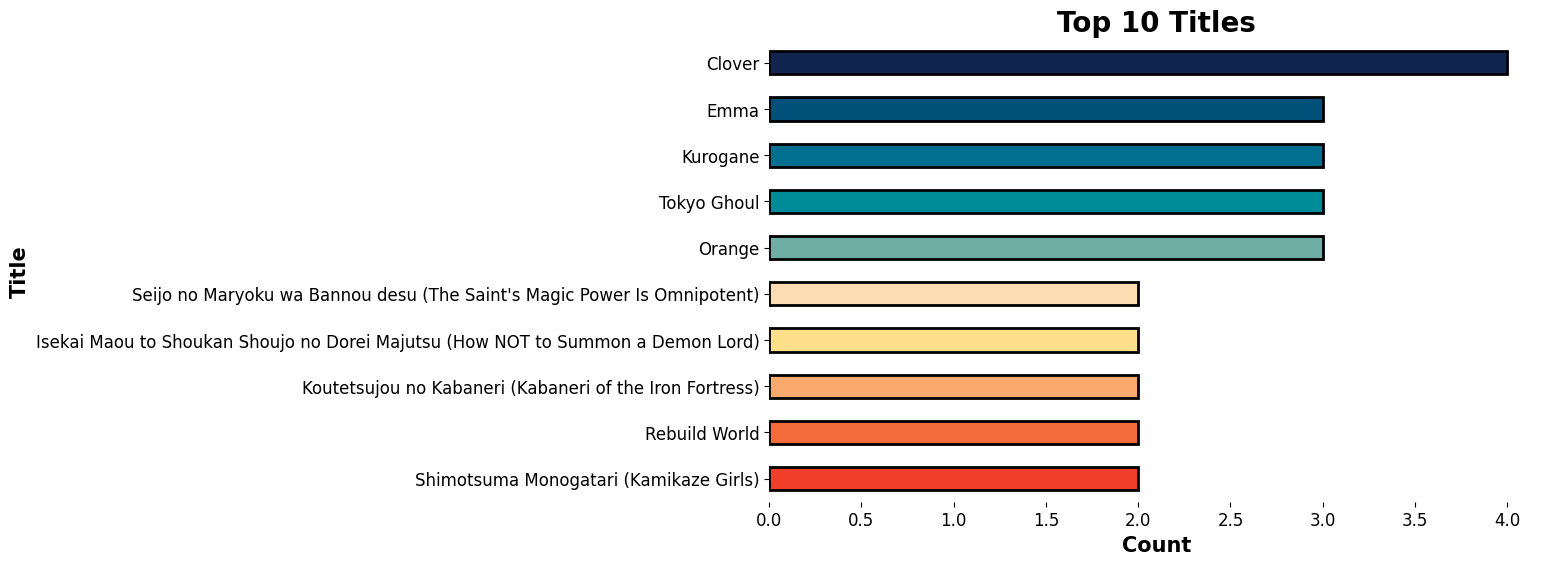

In [25]:
top_10_titles = manga_df['Title'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_titles.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Titles', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Title', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()

sns.despine(left=True, bottom=True)
plt.show()

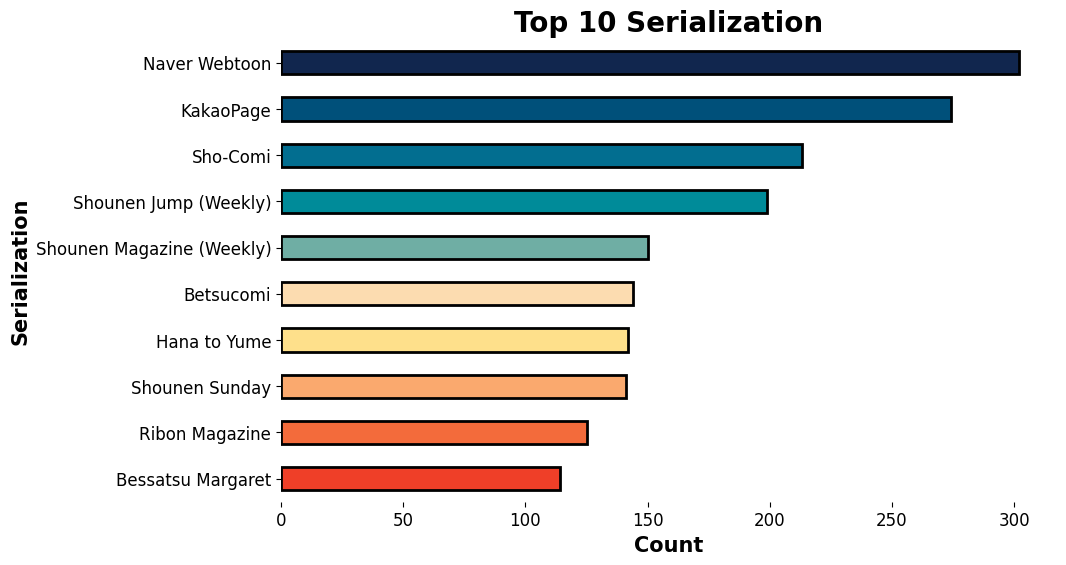

In [26]:
top_10_se = manga_df['Serialization'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_se.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Serialization', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Serialization', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()

sns.despine(left=True, bottom=True)
plt.show()

**`Status`** finished is the most common

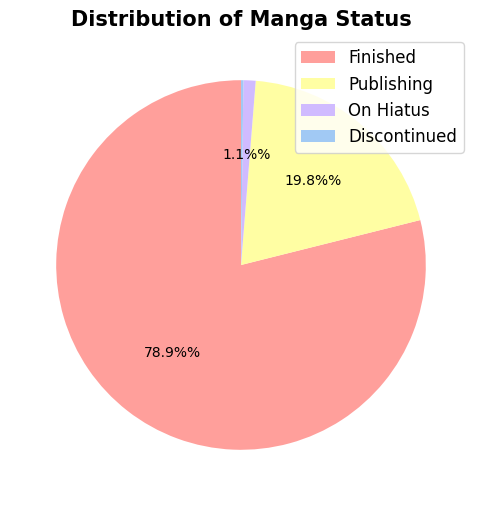

In [27]:
status_counts = manga_df['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1']
plt.pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', colors=colors, startangle=90)
plt.title('Distribution of Manga Status', fontsize=15, fontweight='bold')
plt.legend(status_counts.index, fontsize=12)
plt.show()


**Columns`Genres` and `Themes`**

Both `Genres` and `Themes` columns consist of classifications where each row is a list representing a combination of classifications. To analyze these columns, we will:

- Concatenate lists within each column.
- Calculate unique values `diff_vals` and the number of unique values `num_diff_vals` in each column.
- Calculate the missing rows ratio of each column.

In [28]:
manga_df[['Genres', 'Themes','Author','Demographics']]

,Genres,Themes,Author,Demographics
0,"Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological","Studio Gaga, Miura Kentarou",Seinen
1,"Action, Adventure, Mystery, Supernatural",NaN,Araki Hirohiko,"Seinen, Shounen"
2,"Action, Adventure, Award Winning","Historical, Samurai","Yoshikawa Eiji, Inoue Takehiko",Seinen
3,"Action, Adventure, Fantasy",NaN,Oda Eiichiro,Shounen
4,"Award Winning, Drama, Mystery","Adult Cast, Psychological",Urasawa Naoki,Seinen
...,...,...,...,...
9995,NaN,NaN,"Kinoshita Hanta, Roppongi Aya",Seinen
9996,"Drama, Fantasy, Romance, Supernatural",NaN,Tenkawa Ai,Shoujo
9997,"Action, Horror, Mystery",NaN,"Inui Souda, Mori Kazumasa",Shounen
9998,"Drama, Romance",NaN,Ishida Takumi,Shoujo


In [29]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Themes': [.0] * 3,
                                 'Author': [.0] * 3,
                                'Demographics': [.0]*3
                                },
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

# Concatenate and find unique values
list_col_dist_df.loc['Distribution'] = manga_df[['Genres', 'Themes','Author','Demographics']].apply(lambda col: col.str.cat(sep=', ').split(', ')).apply(lambda x: pd.Series(x).value_counts().to_dict())

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'] = manga_df[['Genres', 'Themes','Author','Demographics']].apply(lambda col: col.str.cat(sep=', ').split(', ')).apply(lambda x: len(set(x)))

list_col_dist_df.loc['Missing_ratio'] = manga_df[['Genres', 'Themes','Author','Demographics']].apply(lambda col: col.isna().sum() / manga_df.shape[0] * 100)

list_col_dist_df

,Genres,Themes,Author,Demographics
Missing_ratio,27.14,82.2,0.0,38.88
Num_diff_vals,19,52,7230,5
Distribution,"{'Romance': 3087, 'Comedy': 2936, 'Drama': 235...","{'School': 826, 'Isekai': 246, 'Psychological'...","{'Tezuka Osamu': 59, 'Ryukishi07': 47, 'Hwang ...","{'Shoujo': 2274, 'Shounen': 1818, 'Seinen': 16..."


*General view:*

+ About Missing_ratio:
     + `Genres` is missing a lot of data, missing **27%** of the data
     + `Themes` is missing almost all data, missing **82%** of the data
     + `Demographics' is missing a lot of data, missing **38%** of the data
     + `Author` is full data (missing rate = 0%)
    
+ About Num_diff_vals, Diff_vals:
     + `Genres` has 19 types
     + `Themes` has 52 types
     + `Demographics` has 5 types
     + `Author` has 7226 different authors

Both `Genres` and `Themes` columns have a many unique values, so we will visualize the 10 most appearing values of these 2 columns.

In [30]:
manga_df['Demographics'].str.split(', ').explode().value_counts()

Demographics
Shoujo     2274
Shounen    1818
Seinen     1630
Josei       367
Kids         33
Name: count, dtype: int64

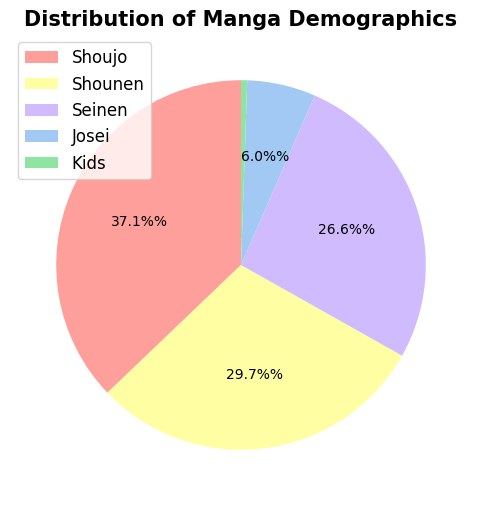

In [31]:
demographic_counts = manga_df['Demographics'].str.split(', ').explode().value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1']
plt.pie(demographic_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', colors=colors, startangle=90)
plt.title('Distribution of Manga Demographics', fontsize=15, fontweight='bold')
plt.legend(demographic_counts.index, fontsize=12)
plt.show()


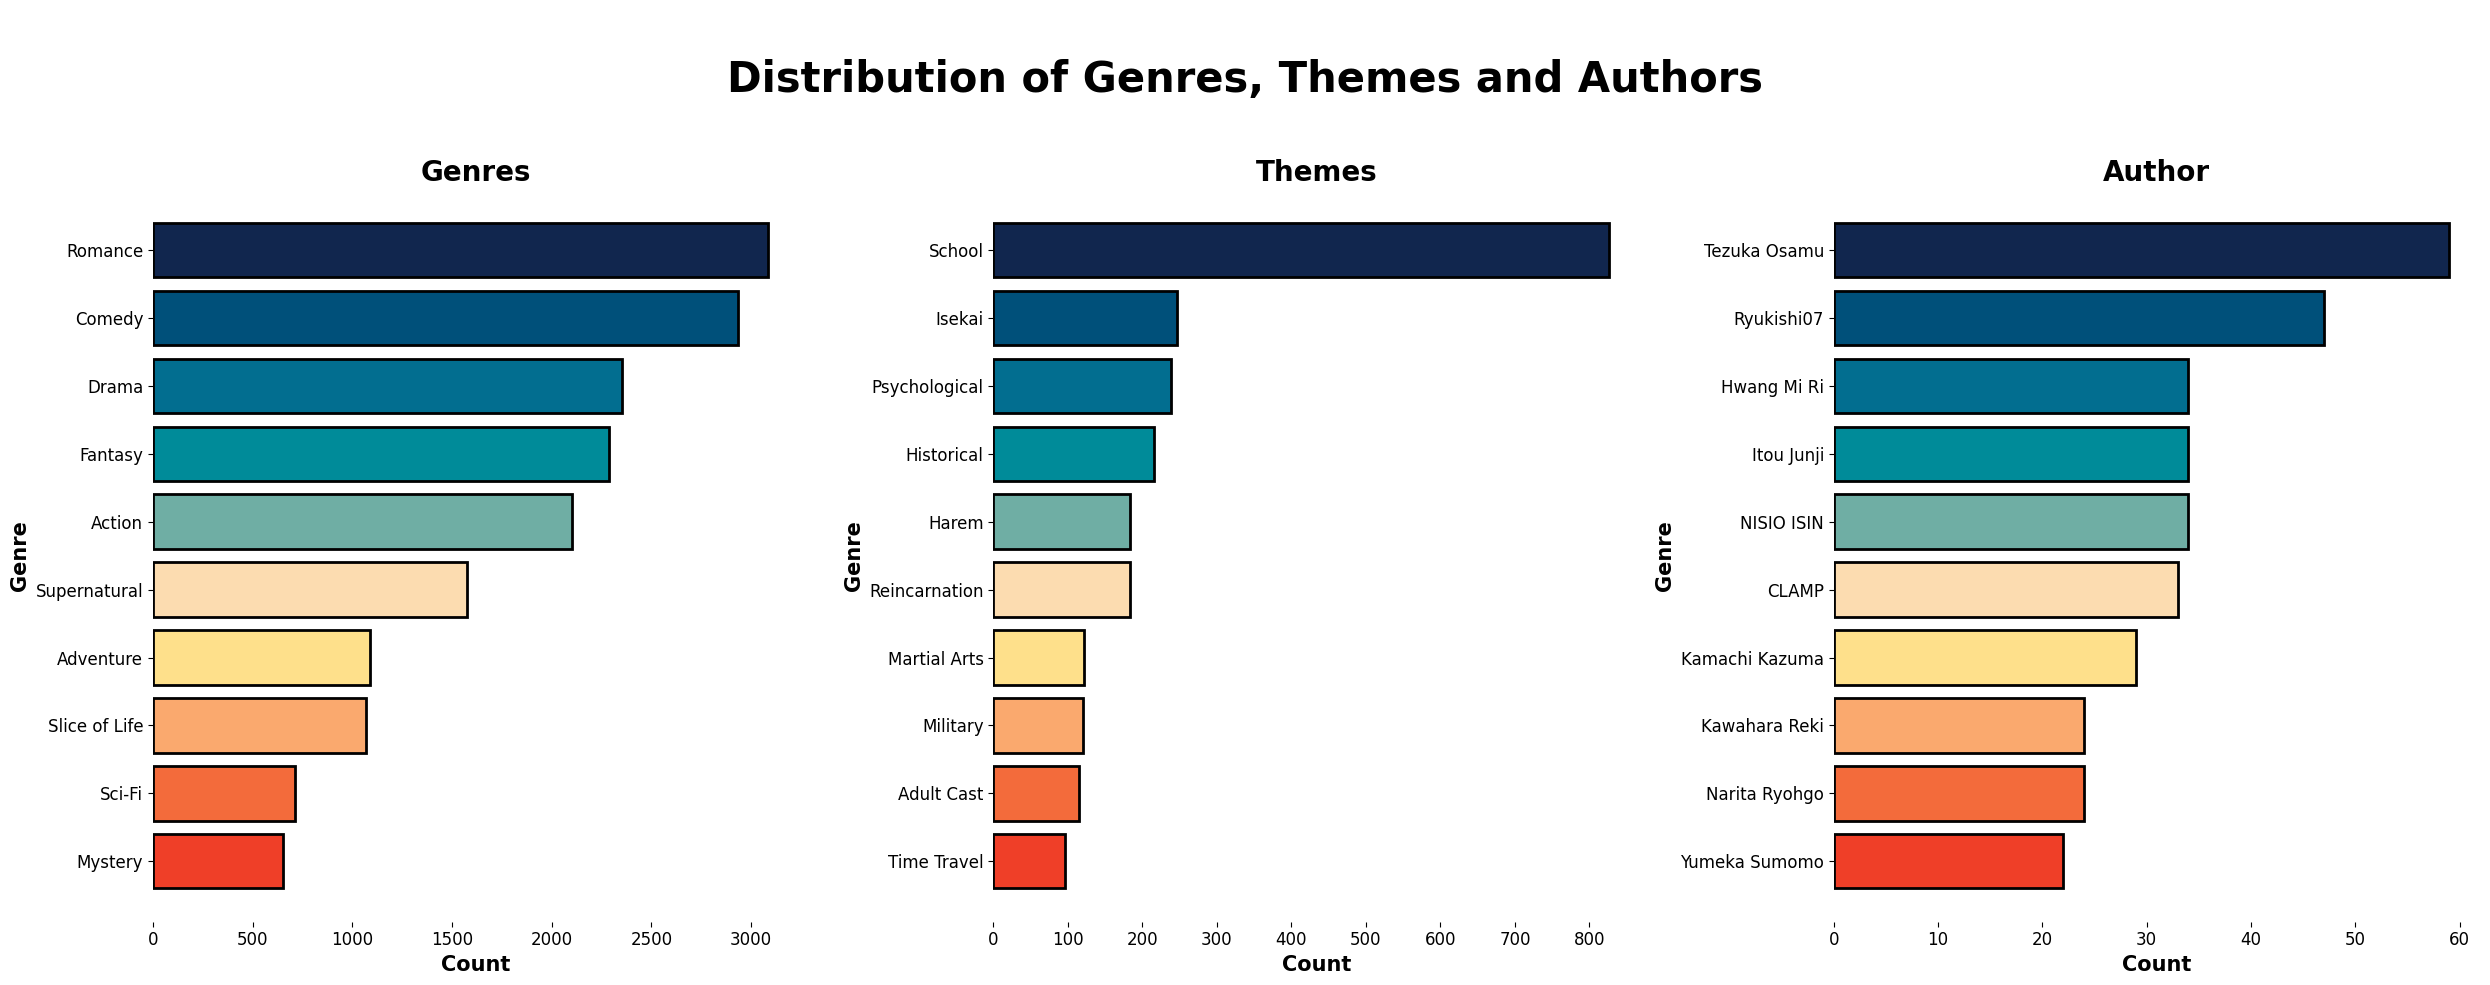

In [32]:
# visualize the distribution of genres and themes
genres = manga_df['Genres'].str.split(', ').explode().str.strip()
genres_counts = genres.value_counts().head(10)
themes = manga_df['Themes'].str.split(', ').explode().str.strip()
themes_counts = themes.value_counts().head(10)
author = manga_df['Author'].str.split(', ').explode().str.strip()
author_counts = author.value_counts().head(10)

fig, ax = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle('\nDistribution of Genres, Themes and Authors\n', fontsize=30, fontweight='bold')
for i, (col, counts) in enumerate(zip(['Genres', 'Themes', 'Author'], [genres_counts, themes_counts, author_counts])):
    ax[i].barh(counts.index, counts, color=color, linewidth=2, edgecolor='k')
    ax[i].set_title(col, fontsize=20, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=15, weight='bold')
    ax[i].set_ylabel('Genre', fontsize=15, weight='bold')
    ax[i].tick_params(labelsize=12)
    ax[i].invert_yaxis()

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<a class = "anchor" id = "2.3"></a>
## <span style='color:#2B9C15 '> 2.3 Missing Values, Abnormal Values and Outliers </span>

### 👉 **Missing Values** <a class = "anchor" id = "2.3.1"></a>

#### 👉 **Missing Values per Column**

We will save missing ratios of all the columns calculated above into DataFrame `missing_ratio_df` and visualize them in a bar chart.

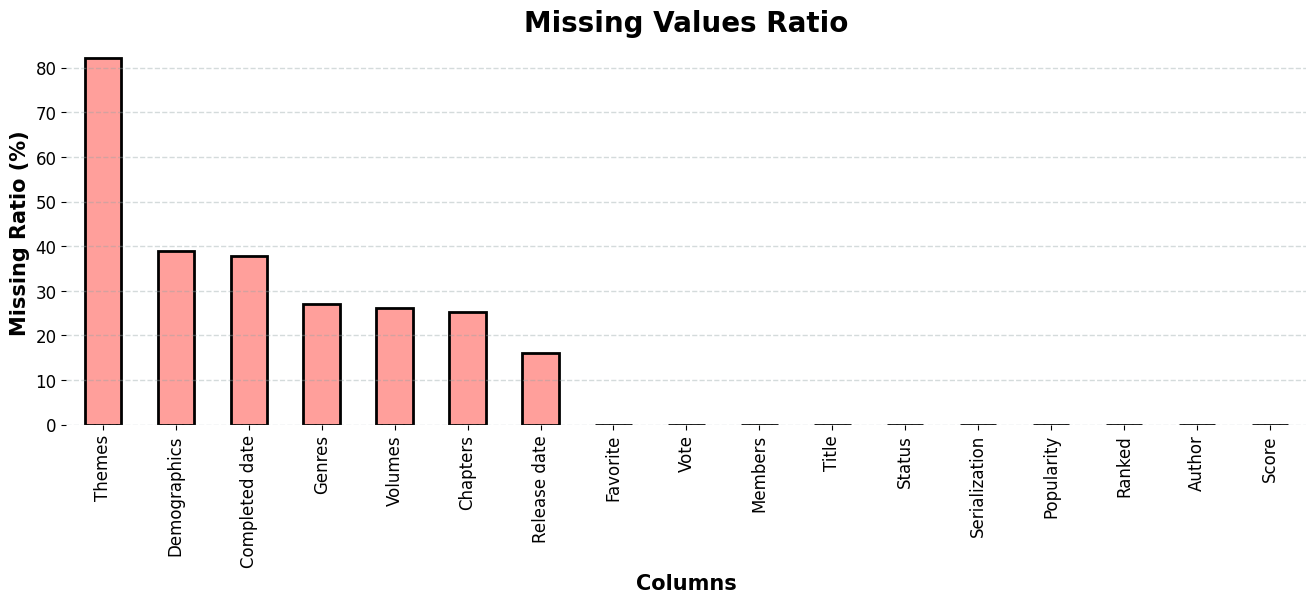

In [33]:
missing_ratio_df = pd.concat([num_col_dist_df.loc['missing ratios'], str_col_dist_df.loc['Missing_ratio'], list_col_dist_df.loc['Missing_ratio']], axis=0)
missing_ratio_df = missing_ratio_df.sort_values(ascending=False)
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Missing Values Ratio', fontsize=20, fontweight='bold')
plt.xlabel('Columns', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

#### 👉 **Missing Values per Row**

In [34]:
number_missing_per_row = manga_df.isna().sum(axis=1)
missing_per_row_df = pd.DataFrame({'Number of Rows': number_missing_per_row.value_counts().sort_index()})
missing_per_row_df.index.name = 'Number of Missing Values'
missing_per_row_df['Percentage'] = (missing_per_row_df['Number of Rows'] / manga_df.shape[0] * 100).round(2)
missing_per_row_df

,Number of Rows,Percentage
Number of Missing Values,,
0,530,5.30
1,2372,23.72
2,2204,22.04
3,1584,15.84
4,1560,15.60
5,1194,11.94
6,485,4.85
7,69,0.69
8,2,0.02


### 👉 **Abnormal Values and Outliers** <a class = "anchor" id = "2.3.2"></a>

We will use the **`describe()`** function again to calculate the summary statistics of the columns with numeric data types and see if there are any abnormal values.

In [35]:
manga_df.describe().round(2)

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Release date,Completed date
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,7382.00,7479.00,8387,6212
mean,7.37,3505.67,5000.79,8737.93,8824.94,348.14,6.65,47.93,2012-03-03 09:32:46.328841984,2012-07-11 15:41:36.587250688
min,6.90,100.00,1.00,1.00,203.00,0.00,1.00,1.00,1950-01-15 00:00:00,1951-02-20 00:00:00
25%,7.08,318.00,2500.75,3104.50,1134.00,6.00,2.00,8.00,2008-02-22 12:00:00,2008-12-11 12:00:00
50%,7.28,792.00,4992.50,7351.50,2488.00,19.00,4.00,23.00,2013-04-24 00:00:00,2013-11-25 00:00:00
75%,7.56,2248.00,7500.25,13281.25,6393.50,75.00,9.00,56.00,2018-03-13 12:00:00,2018-06-15 00:00:00
max,9.47,401815.00,10060.00,32962.00,670559.00,123574.00,200.00,1957.00,2023-11-27 00:00:00,2024-01-01 00:00:00
std,0.38,14026.00,2887.47,6707.79,27776.00,2746.35,8.22,77.82,NaN,NaN


We observe that all columns have reasonable value ranges, and there is nothing unusual. Let's attempt to check a time constraint for the `Release date` and `Completed date `columns to see if there are any unreasonable values.

In [36]:
abnormal_date = manga_df[manga_df['Release date'] > manga_df['Completed date']]
if abnormal_date.empty:
    print('There are no abnormal dates')
else:
    print(f'There are {abnormal_date.shape[0]} rows with abnormal dates')
    print('We will drop those rows')
    manga_df = manga_df.drop(abnormal_date.index)
    print(f'After drop abnormal dates, there are {manga_df.shape[0]} rows left')


There are 1 rows with abnormal dates
We will drop those rows
After drop abnormal dates, there are 9999 rows left


Next, we will use **boxplot** to examine outliers of columns with numeric data types.

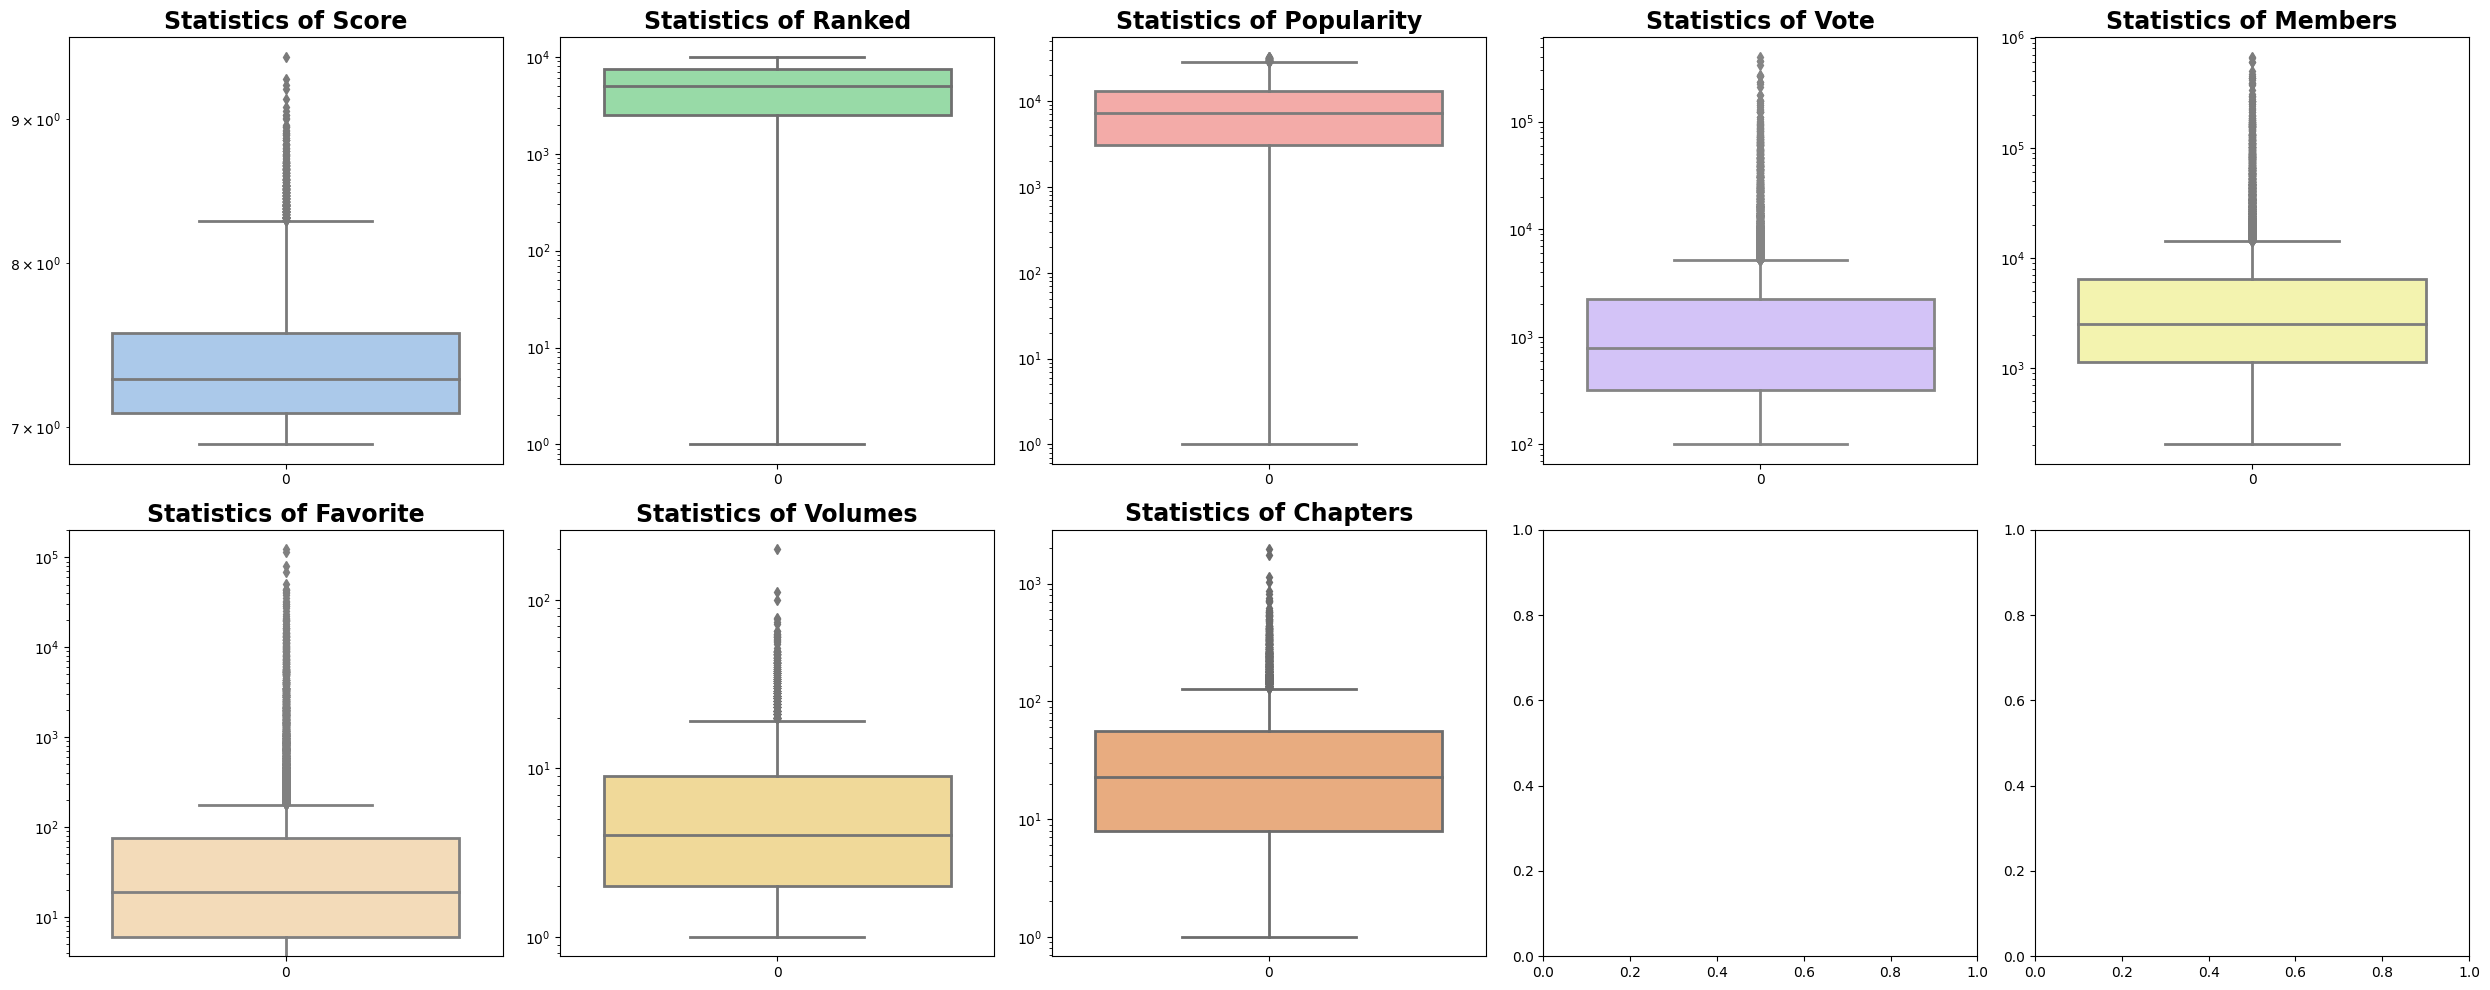

In [37]:
col = ['Score', 'Ranked', 'Popularity', 'Vote','Members','Favorite','Volumes','Chapters']
#color = ['#a1c9f4', '#8de5a1', '#b9f2f0', '#d0bbff', '#fffea3', '#fffea3', '#d0bbff','#ff9f9b','#8de5a1','#a1c9f4']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3','#fcdcb0','#FEE08B','#faa96e','#f36b3b','#ef3f28','#CC0028']
rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize = (cols*5, rows*5))
for r in range(0, rows):
    for c in range(0, cols):
        i = r*cols + c
        if i < len(col):
            ax_i = ax[r, c]
            sns.boxplot(manga_df[col[i]], ax=ax_i, color=color[i], linewidth=2)
            ax_i.set_yscale('log')

            ax_i.set_title(f"Statistics of {col[i]}", fontweight='bold', fontsize=17)
            ax_i.set(ylabel=None)
            ax_i.grid(False)

plt.tight_layout()

Although all columns have data points beyond the 1.5 IQR range, we will refrain from deleting these data points. As analyzed in the **Histogram** section, these columns have a wide distribution, and the data points outside the 1.5 IQR range represent values that, while very large, still fall within the reasonable value range for each respective column.

# <p style="text-align: center; font-size: 2rem"> <b> Data Modeling </b> </p>
<a class="anchor" id ="3"></a>

<a class="anchor" id="3.1"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3.1 Problem Statement </div>


## <span style='color:#2B9C15 '> Problem description</span>

- Manga, a style of Japanese comic books and graphic novels, has achieved widespread popularity globally, contributing to a multibillion-dollar industry. The manga industry continues to grow rapidly, producing a diverse range of stories and genres.

- In this context, the problem is to predict the rating score of a manga based on its features. The goal is to develop a model that can estimate the rating of a manga series, providing valuable insights for manga enthusiasts and publishers.


## <span style='color:#2B9C15 '>  Purpose of solving the problem </span>

- **Enhanced Decision-Making**: By predicting the rating of a manga series, readers and enthusiasts can make more informed decisions about which manga to explore without having to read the entire series or spend time searching for reviews.

- **Market Insights**:  For publishers, distributors, and industry stakeholders, understanding the factors influencing a manga's rating provides valuable market insights. This knowledge can inform strategic decisions related to content creation, marketing, and audience targeting.

<a class="anchor" id="3.2"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3.2 Data Preparation  </div>

👉 Before modelling, the data must be prepared. We will perform the following steps:
- Feature engineering
    - Feature selection
    - Convert categorical features to numerical
- Split data into training, validation, and test sets

## <span style='color:#2B9C15 '>  Feature Engineering</span>

### 👉 Feature Selection

1. We will select meaningful features that are suitable for the problem and drop unnecessary features.

    - The `Ranked` of manga series is determined based on `Score` by arranging the manga series in descending order of `Score`. Therefore, when predicting the `Score` of a manga, we cannot use `Ranked` as a feature, so we will drop this feature.
    
    - Features `Title`, `Author`, `Serialization`  have a large number of unique values and do not provide meaningful insights for analyzing or predicting the score of a manga series. Therefore, we will drop these two features.

    - `Status` is a feature that indicates what status a manga is in (Publishing, Finished, ...). This feature has no meaning in predicting the `Score` of a manga, so we will drop this feature as well.


In [38]:
new_df = manga_df.drop(columns=['Title', 'Author','Ranked', 'Status','Serialization'])
new_df.head()

,Score,Vote,Popularity,Members,Favorite,Volumes,Chapters,Genres,Themes,Demographics,Release date,Completed date
0,9.47,334154,1,670559,123574,NaN,NaN,"Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological",Seinen,1989-08-25,NaT
1,9.30,157522,26,257957,43113,24.0,96.0,"Action, Adventure, Mystery, Supernatural",NaN,"Seinen, Shounen",2004-01-19,2011-04-19
2,9.25,138009,15,368332,40575,37.0,327.0,"Action, Adventure, Award Winning","Historical, Samurai",Seinen,1998-09-03,2015-05-21
3,9.22,368951,3,603122,115123,NaN,NaN,"Action, Adventure, Fantasy",NaN,Shounen,1997-07-22,NaT
4,9.15,94806,29,238291,20674,18.0,162.0,"Award Winning, Drama, Mystery","Adult Cast, Psychological",Seinen,1994-12-05,2001-12-20


2. Use the correlation matrix to consider the correlation of features with `Score` and drop features with low correlation (correlation magnitude < 0.2)

But first, we will convert the numerical features to right data types. In this case, we will convert `Release date` and `Completed date`

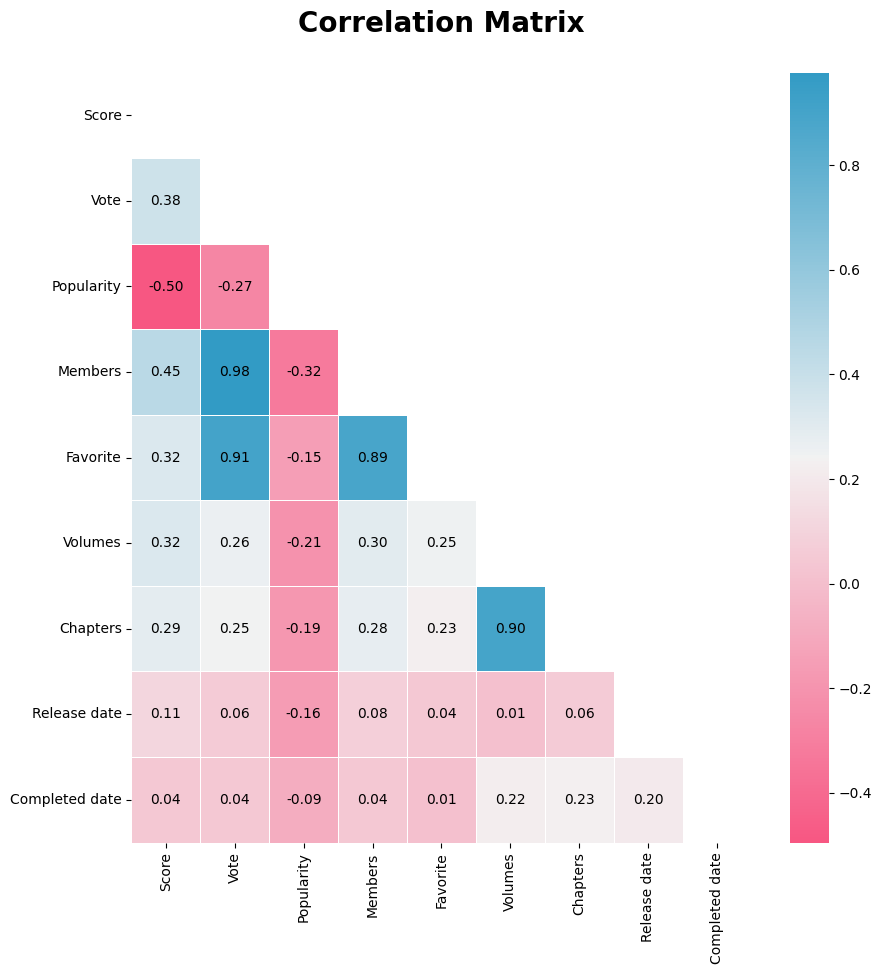

In [39]:
corr = new_df[['Score', 'Vote', 'Popularity', 'Members', 'Favorite','Volumes','Chapters','Release date','Completed date']].corr()

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, ax=ax, mask=mask, cmap=cmap,fmt='.2f', linewidths=.5, linecolor='w',annot_kws=dict(color="k"))
plt.title('Correlation Matrix\n', fontsize=20, weight='bold')
plt.show()

`Released date` and `Completed date` have low correlation with `Score` and will be dropped.

In [40]:
new_df = new_df.drop(columns=['Release date', 'Completed date'])

### 👉 Convert categorical features to numerical features

The `Genres` feature represents a multi-label category, so we need to convert it to a list type first and then use multi-label binarizer to convert it to a numerical feature.

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

columns_to_encode = ['Genres', 'Themes', 'Demographics']

mlb = MultiLabelBinarizer()

new_df['Genres'] = new_df['Genres'].str.split(', ')
new_df['Themes'] = new_df['Themes'].str.split(', ')
new_df['Demographics'] = new_df['Demographics'].str.split(', ')

encoded_columns = pd.DataFrame(mlb.fit_transform(new_df[columns_to_encode]), columns=mlb.classes_)

# Ensure the shape of the DataFrame matches the original DataFrame's number of rows
encoded_columns = encoded_columns.reindex(new_df.index, fill_value=0)

# Drop the original columns and concatenate the encoded ones
new_df = pd.concat([new_df, encoded_columns], axis=1).drop(columns=columns_to_encode)

# Display the modified DataFrame
new_df.head()

,Score,Vote,Popularity,Members,Favorite,Volumes,Chapters,D,G,T,...,e,g,h,i,m,n,o,p,r,s
0,9.47,334154,1,670559,123574,NaN,NaN,0,1,0,...,1,0,0,0,0,1,0,0,1,1
1,9.30,157522,26,257957,43113,24.0,96.0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
2,9.25,138009,15,368332,40575,37.0,327.0,1,0,0,...,1,1,1,1,1,0,1,1,1,1
3,9.22,368951,3,603122,115123,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.15,94806,29,238291,20674,18.0,162.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style='color:#2B9C15 '>  Split data </span>
👉 In this step, we will follow these steps:

- Determine the target variable and the feature variables
- Split the data into training set, validation set and test set with the ratio of 70:20:10
- Scale the data using MinMaxScaler
    $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [42]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from sklearn.preprocessing import MinMaxScaler

features = ['Vote', 'Popularity', 'Members', 'Favorite', 'Volumes', 'Chapters'] + list(mlb.classes_)
target = 'Score'
new_df = new_df.dropna(subset=features + [target])

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(new_df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.33, random_state=42)

# Separate features and target variables
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Display the shapes of the datasets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4795, 21)
y_train shape: (4795,)
X_val shape: (1376, 21)
y_val shape: (1376,)
X_test shape: (679, 21)
y_test shape: (679,)


<a class="anchor" id="3.3"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3.3 Create, train and test models </div>


## <span style='color:#2B9C15 '> 📕 Models </span>

To solve the problem, we will use the following machine learning models:

- Linear Regression
- XGBoost
- Random Forest

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_jobs=-1),
    'Random Forest': RandomForestRegressor(n_jobs=-1)
}


## <span style='color:#2B9C15 '> 📕 Metrics for evaluation models </span>
👉 The problem of predicting the `Score` of a manga series is a regression problem, so we will use metrics suitable for the regression problem to evaluate the model. Metrics used include:

- Mean Squared Error (MSE)
    $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
- R2 Score
    $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y_i})^2}$$


## <span style='color:#2B9C15 '> 📕 Train models on training data </span>
**👉 We will train the models on the training data and evaluate the models on the validation data. Both MSE and R2 score will be stored to compare the performance of the models.**

In [44]:
train_scores = {}
val_scores = {}
mse_train = {}
mse_val = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_scores[model_name] = model.score(X_train, y_train)
    val_scores[model_name] = model.score(X_val, y_val)
    mse_train[model_name] = mean_squared_error(y_train, model.predict(X_train))
    mse_val[model_name] = mean_squared_error(y_val, model.predict(X_val))

**👉 Visualize the results of the models**

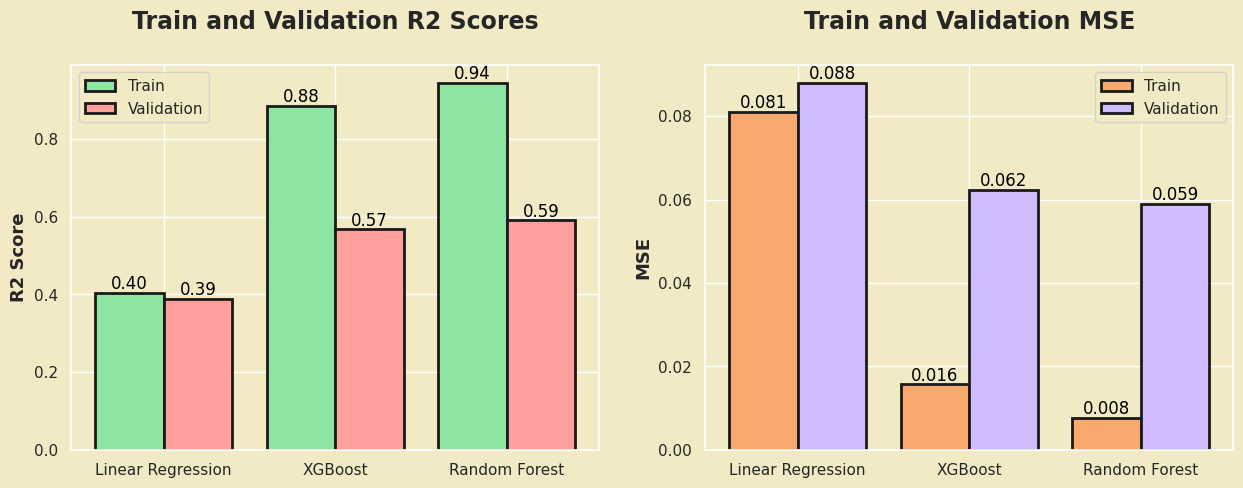

In [45]:
categories = list(train_scores.keys())
train_values = list(train_scores.values())
val_values = list(val_scores.values())
mse_train_values = list(mse_train.values())
mse_val_values = list(mse_val.values())

indices = np.arange(len(categories))
# sns.set_style("darkgrid")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#'#8de5a1', '#ff9f9b'
bars1_train = ax[0].bar(indices - 0.2, train_values, width=0.4, label='Train', color='#8de5a1', linewidth=2, edgecolor='k')
bars1_val = ax[0].bar(indices + 0.2, val_values, width=0.4, label='Validation', color='#ff9f9b', linewidth=2, edgecolor='k')
ax[0].set_ylabel('R2 Score', fontsize=13, weight='bold')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(categories)
ax[0].set_title('Train and Validation R2 Scores\n', fontsize=17, weight ='bold')
ax[0].legend()
ax[0].bar_label(bars1_train, fmt='%.2f', fontsize=12, color='black')  # Annotate bars with Train R2 scores
ax[0].bar_label(bars1_val, fmt='%.2f', fontsize=12, color='black')  # Annotate bars with Validation R2 scores

# Bar chart for MSE
bars2_train = ax[1].bar(indices - 0.2, mse_train_values, width=0.4, label='Train', color='#faa96e', linewidth=2, edgecolor='k')
bars2_val = ax[1].bar(indices + 0.2, mse_val_values, width=0.4, label='Validation', color='#d0bbff',  linewidth=2, edgecolor='k')
ax[1].set_xticks(indices)
ax[1].set_ylabel('MSE', fontsize=13, weight='bold')
ax[1].set_xticklabels(categories)
ax[1].set_title('Train and Validation MSE\n', fontsize=17, weight ='bold')
ax[1].legend()
ax[1].bar_label(bars2_train, fmt='%.3f', fontsize=12, color='black')  # Annotate bars with Train MSE values
ax[1].bar_label(bars2_val, fmt='%.3f', fontsize=12, color='black')  # Annotate bars with Validation MSE values

plt.show()

### 📖 **COMMENTS:**

- Random Forest emerges as the algorithm with the best performance, showcasing the lowest MSE and the highest R2 score on both the training and test sets.
- XGBoost also demonstrates commendable results with high MSE and R2 scores, albeit slightly trailing behind Random Forest.
- Linear Regression yields the least favorable outcomes, displaying the highest MSE and the lowest R2 score. However, it exhibits a smaller disparity between the training and test sets compared to the other two algorithms.

**👉 Learning process of models**

- The three machine learning algorithms used in this study learn once on the entire dataset. Unlike deep learning algorithms, which learn gradually over each epoch, it is difficult to visualize the learning process of these models.

- We will address this challenge by using the learning curve of the scikit-learn library. This will allow us to visualize the learning process of these models by having them learn gradually over multiple training runs with increasing training set sizes

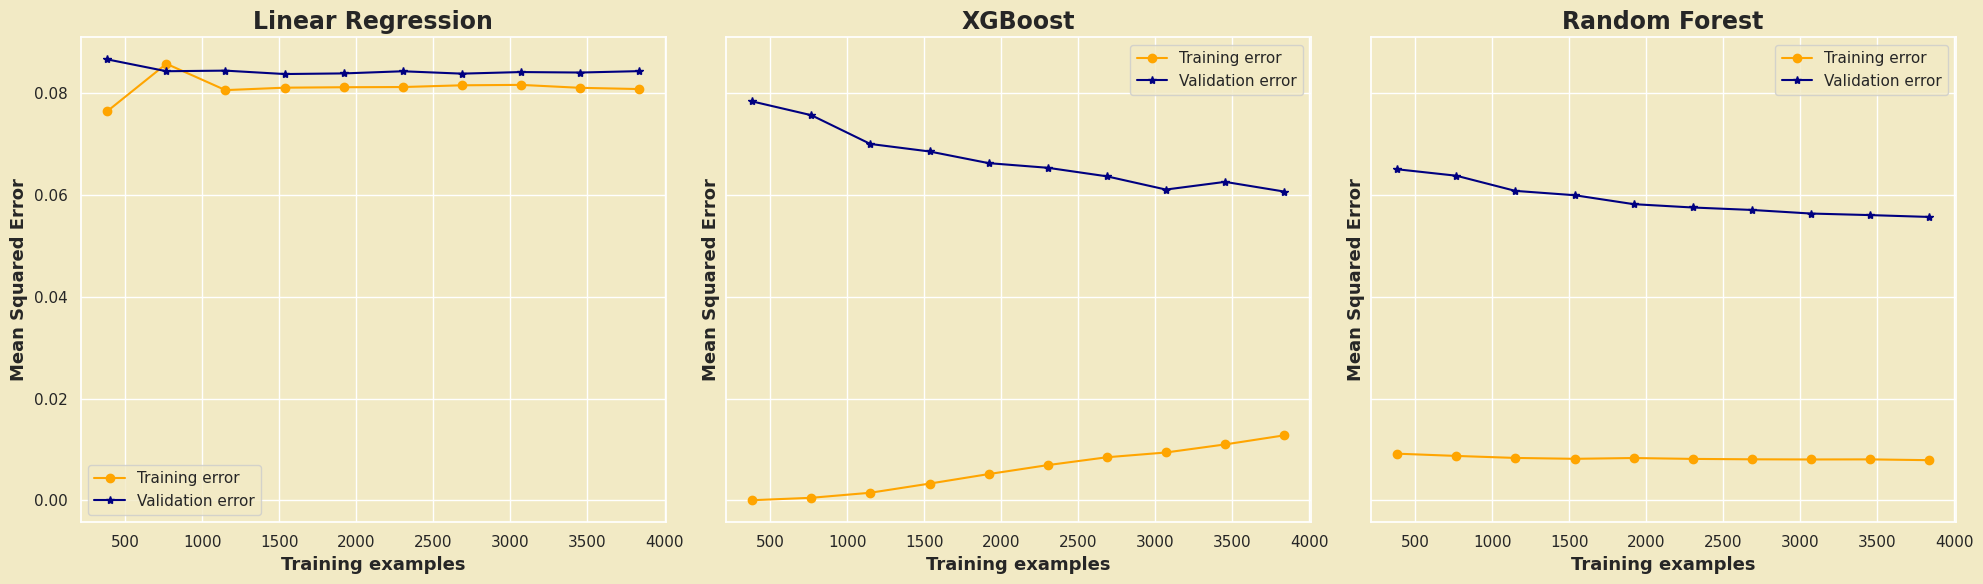

In [46]:
def plot_learning_curve(model, X, y, ax, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training error', color='orange', marker='o')
    ax.plot(train_sizes, val_scores_mean, label='Validation error', color='navy', marker='*')

    ax.set_title(title, fontsize=17,fontweight='bold')
    ax.set_xlabel('Training examples', fontsize=13, weight='bold')
    ax.set_ylabel('Mean Squared Error', fontsize=13, weight='bold')
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(1, 3, figsize=(20, 6),sharey=True)

for (model_name, model), ax in zip(models.items(), axes):
    plot_learning_curve(model, X_train, y_train, ax, model_name)

plt.tight_layout()
plt.show()

### 📖 **COMMENTS:**
**Learning Performance of Models**:

- Random Forest stands out as the top-performing model, achieving the best learning results with an MSE of approximately 0.01 on the training set and around 0.05 on the test set.

- XGBoost also demonstrates strong learning capabilities, with a slightly lower performance than the Random Forest model. It achieves an MSE of approximately 0.01 on the training set and around 0.06 on the test set.

- Linear Regression exhibits lower learning proficiency compared to the two models, with MSE values nearly equal between the training and test sets, around 0.08.

**Learning Process**:

- The MSE loss for all three models consistently decreases as the size of the training set increases, converging to a specific value.

- Linear Regression converges relatively quickly on the validation set despite starting with a higher initial MSE.

- Random Forest converges slowly, and there is a noticeable discrepancy between the training and validation sets.

- XGBoost starts with a nearly zero MSE but experiences an increase as the size of the training set grows.

## 👉 Fine-tune models on validation data

We will fine-tune the models on the validation data using bayesian search to find the best hyperparameters for the models. The hyperparameters we will tune are:

- **Linear Regression**
    - fit_intercept
    - positive
    - n_jobs
- **XGBoost**
    - n_estimators
    - max_depth
    - learning_rate
- **Random Forest**
    - n_estimators
    - max_depth
    - max_features


In [47]:
param_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1, 1],
}
param_xgb = {
    'n_estimators': (10, 100),
    'max_depth': (1, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
}
params_rf = {
    'n_estimators': (10, 100),
    'max_depth': (1, 10),
    'max_features': (0.1, 1.0, 'uniform'),
}

np.int = int
opt_lr = BayesSearchCV(
    LinearRegression(),
    param_lr,
    n_iter=32,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
opt_xgb = BayesSearchCV(
    XGBRegressor(n_jobs=-1),
    param_xgb,
    n_iter=32,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

opt_rf = BayesSearchCV(
    RandomForestRegressor(n_jobs=-1),
    params_rf,
    n_iter=32,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

opt_models = {
    'Linear Regression': opt_lr,
    'XGBoost': opt_xgb,
    'Random Forest': opt_rf
}

opt_lr.fit(X_val, y_val)
opt_xgb.fit(X_val, y_val)
opt_rf.fit(X_val, y_val)

for model_name, model in opt_models.items():
    print(f'{model_name}: {model.best_score_:.4f}')
    for param, value in model.best_params_.items():
        print(f'{param}: {value}')
    print()

Linear Regression: 0.3868
fit_intercept: True
n_jobs: 1
positive: False

XGBoost: 0.5924
learning_rate: 0.18883126588408022
max_depth: 2
n_estimators: 100

Random Forest: 0.5920
max_depth: 6
max_features: 0.9280083037935848
n_estimators: 55




## <span style='color:#2B9C15 '> 📕 Retrain models on training and validation data </span>


In [48]:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

opt_lr.best_estimator_.fit(X_train_val, y_train_val)
opt_xgb.best_estimator_.fit(X_train_val, y_train_val)
opt_rf.best_estimator_.fit(X_train_val, y_train_val)  

RandomForestRegressor(max_depth=6, max_features=0.9280083037935848,
                      n_estimators=55, n_jobs=-1)


## <span style='color:#2B9C15 '> 📕 Evaluate models on test data</span>

**👉 We still use both metrics to evaluate the models on the test set**

In [49]:
test_scores = {}
mse_test = {}
for model_name, model in opt_models.items():
    test_scores[model_name] = model.best_estimator_.score(X_test, y_test)
    mse_test[model_name] = mean_squared_error(y_test, model.predict(X_test))

**👉 Visualize the results of the models**

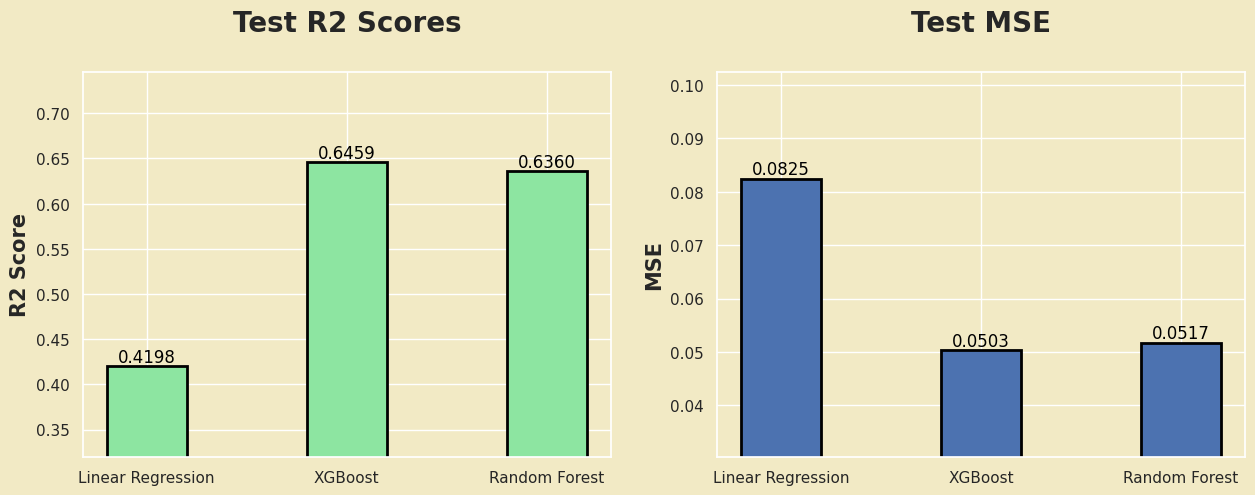

In [50]:
categories = list(test_scores.keys())
test_values = list(test_scores.values())
mse_test_values = list(mse_test.values())

indices = np.arange(len(categories))

sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

bars1 = ax[0].bar(indices, test_values, width=0.4, linewidth=2, edgecolor='black', color='#8de5a1')
ax[0].set_ylabel('R2 Score', fontsize=15, weight='bold')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(categories)
ax[0].set_title('Test R2 Scores\n', fontsize=20, weight ='bold')
ax[0].set_ylim(min(test_values) - 0.1, max(test_values) + 0.1)
ax[0].bar_label(bars1, fmt='%.4f', fontsize=12, color='black')  # Annotate bars with R2 scores

# Bar chart for MSE
bars2 = ax[1].bar(indices, mse_test_values, width=0.4, linewidth=2, edgecolor='black')
ax[1].set_xticks(indices)
ax[1].set_ylabel('MSE', fontsize=15, weight='bold')
ax[1].set_xticklabels(categories)
ax[1].set_title('Test MSE\n', fontsize=20, weight ='bold')
ax[1].set_ylim(min(mse_test_values) - 0.02, max(mse_test_values) + 0.02)
ax[1].bar_label(bars2, fmt='%.4f', fontsize=12, color='black')  # Annotate bars with MSE values

plt.show()

### 📖 **COMMENTS:**

- In the training process on both the training and validation sets, Random Forest continues to exhibit the best performance, with the lowest MSE and the highest R2 score on the test set, followed by XGBoost. Linear Regression remains the least performing model.

- All three models demonstrate acceptable accuracy and errors, with MSE below 0.1 and R2 scores exceeding 0.5. In the future, with additional data and improved data processing techniques, there is potential to enhance the performance of these models

**👉 Let's see 10 random samples from the test set and compare the actual `Score` with the predicted `Score` of the models**

In [51]:
df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': opt_lr.best_estimator_.predict(X_test),
    'XGBoost': opt_xgb.best_estimator_.predict(X_test),
    'Random Forest': opt_rf.best_estimator_.predict(X_test)
})
df.sample(10)

,Actual,Linear Regression,XGBoost,Random Forest
3135,7.47,7.779441,7.363943,7.446670
814,7.96,7.340375,7.532448,7.568524
5875,7.20,7.281234,7.139952,7.147065
1514,7.74,7.614472,7.896769,7.902758
6862,7.13,7.290918,7.145311,7.145281
9061,6.97,7.200033,7.141393,7.133927
9976,6.91,7.363680,7.080363,7.137380
4480,7.32,7.327782,7.235534,7.246746
321,8.29,7.927749,7.996990,7.959084
9425,6.95,7.279228,7.111866,7.112697


<div style="text-align: left; background-color:#EDC0C7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>